In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.utils.data as Data# 小批量学习

In [ ]:
np_data = np.arange(6).reshape(2, 3)
torch_data = torch.from_numpy(np_data)# 将numpy变量转换为torch
tensor2array = torch_data.numpy()# 将torch变量转换为numpy
torch_data.mm(torch_data.t())# 矩阵运算
variable1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32, requires_grad=True)#使用requires_grad已经将其转换为变量
mean = torch.mean(variable1*variable1)
torch.autograd.backward(mean)# 对mean进行反向传播
variable1.grad# 求得梯度
variable1.data.numpy()# 对于变量，将其转换为array需要使用该代码
torch_data.numpy()# 对于tensor，将其转换为array需要使用该代码

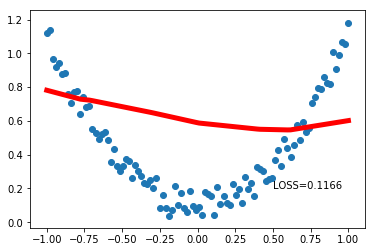

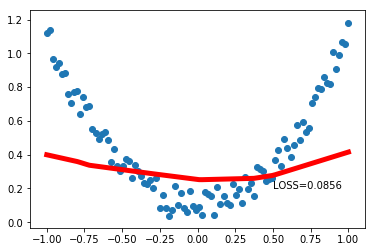

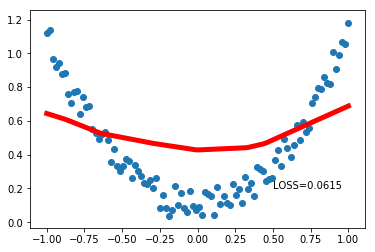

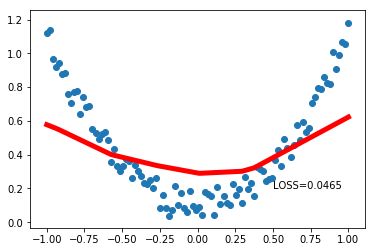

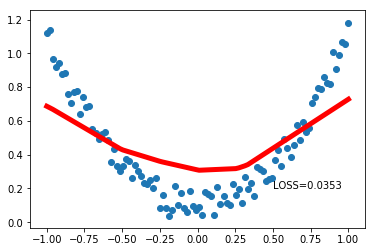

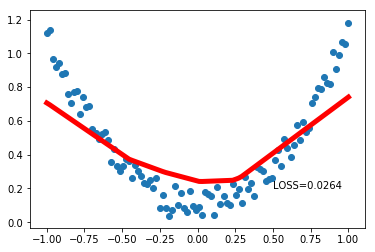

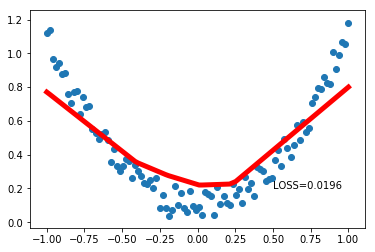

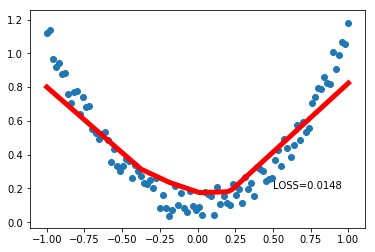

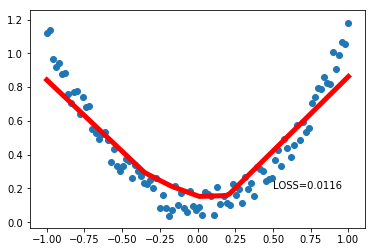

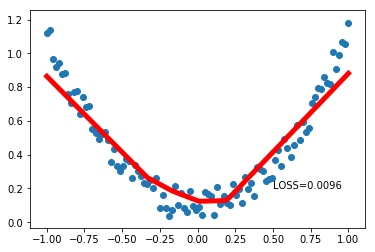

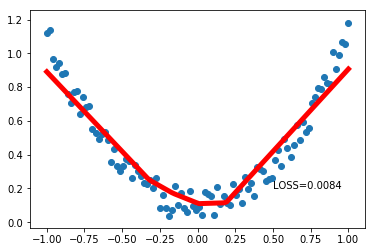

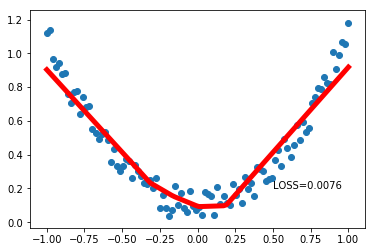

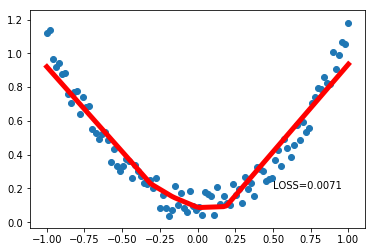

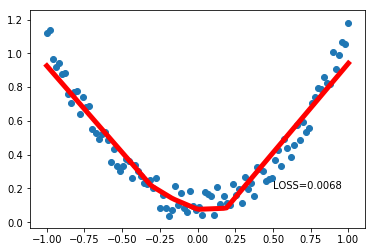

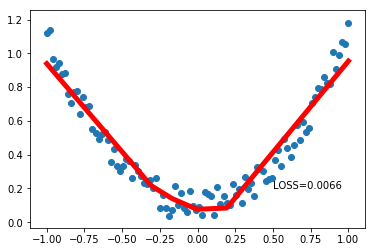

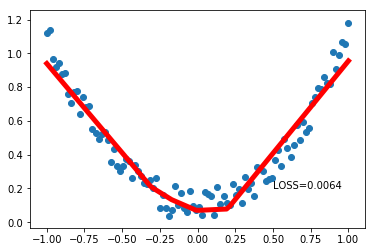

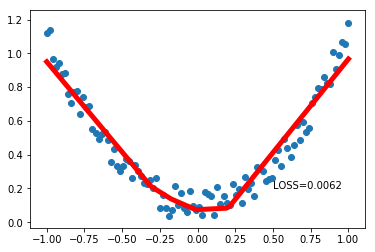

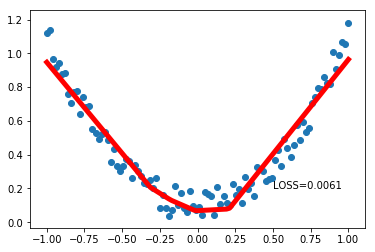

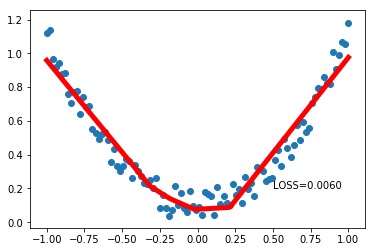

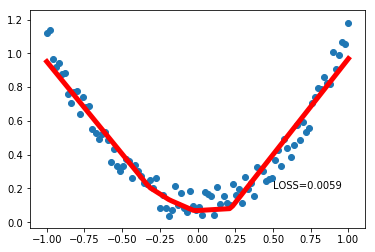

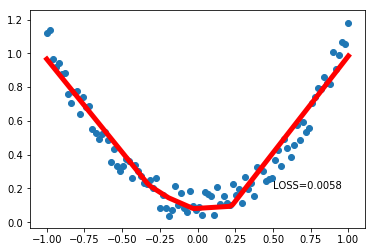

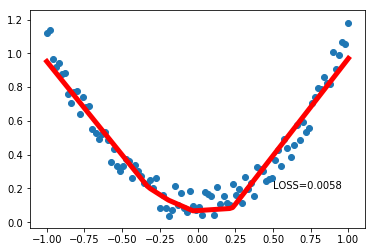

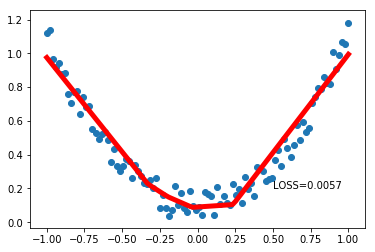

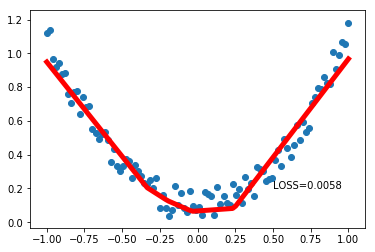

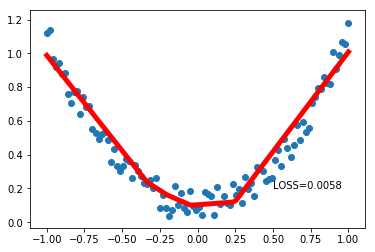

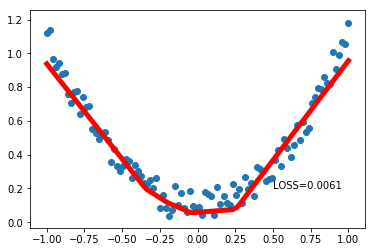

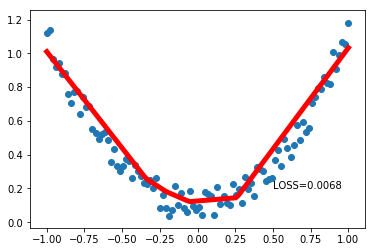

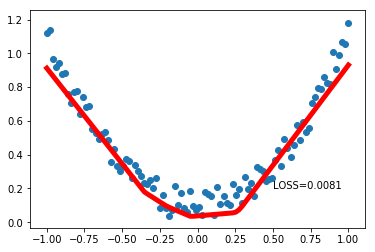

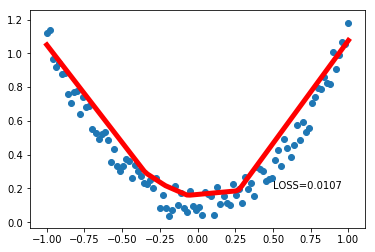

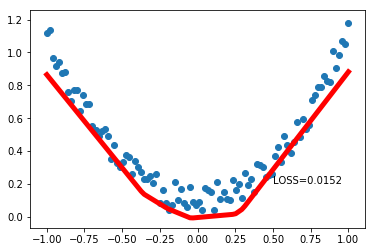

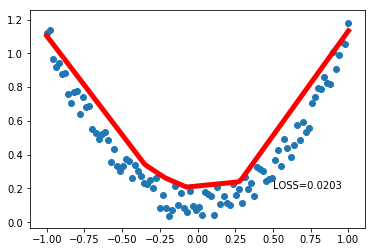

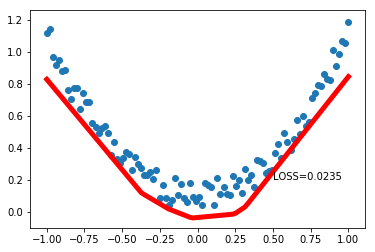

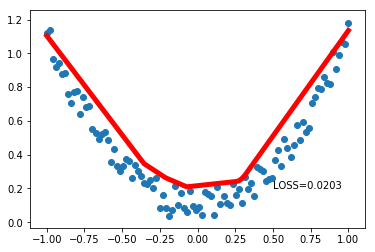

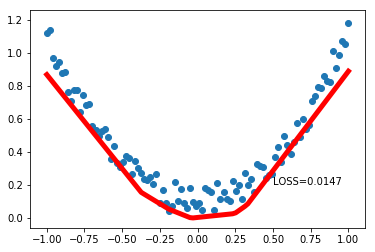

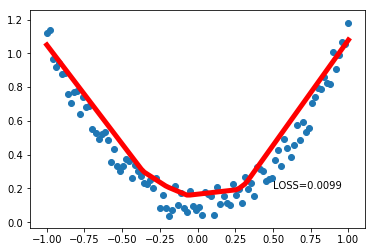

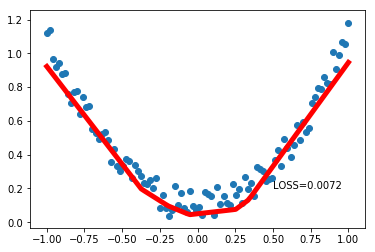

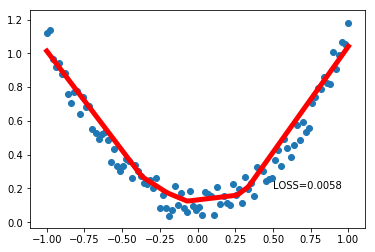

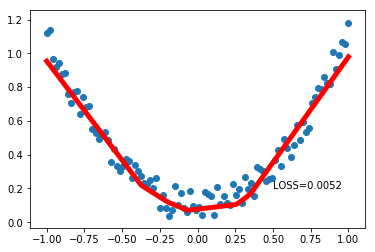

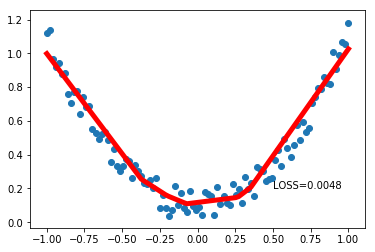

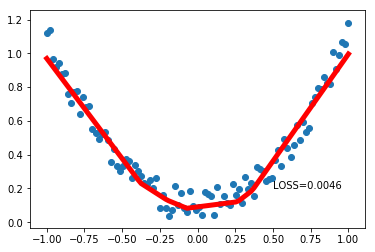

In [3]:
'''利用pytorch进行Regression'''
#数据创建
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
# plt.scatter(x, y)
# plt.show()

#搭建网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        #n_hidden表示隐藏层中神经元的个数
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(1, 10, 1)
# print(net)

#动态图显示部分
plt.ion()
plt.show()

#优化参数方式
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
#loss_function定义
loss_func = torch.nn.MSELoss()
#进行200次迭代
for i in range(200):
    prediction = net.forward(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0.2, 'LOSS=%.4f'%loss.data)
        plt.pause(0.2)
plt.ioff()
plt.show()

tensor(100, dtype=torch.uint8)


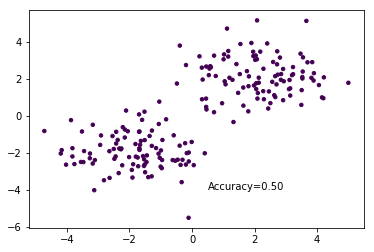

tensor(100, dtype=torch.uint8)


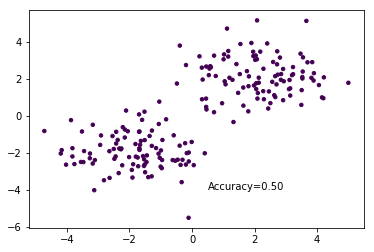

tensor(100, dtype=torch.uint8)


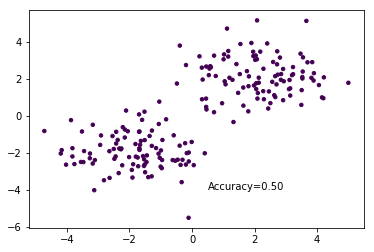

tensor(124, dtype=torch.uint8)


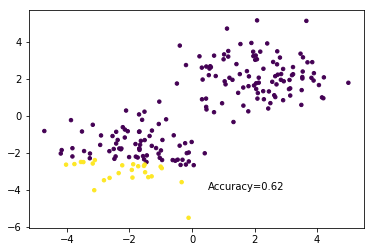

tensor(164, dtype=torch.uint8)


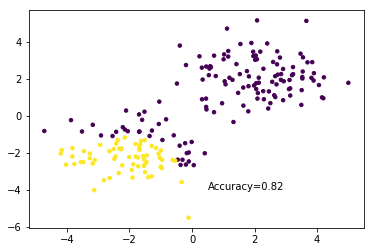

tensor(181, dtype=torch.uint8)


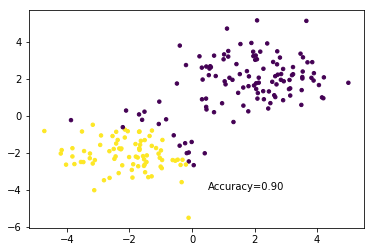

tensor(184, dtype=torch.uint8)


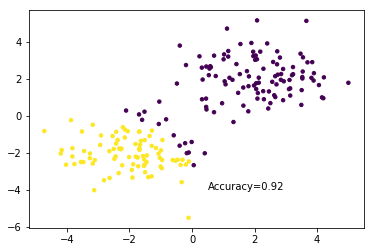

tensor(190, dtype=torch.uint8)


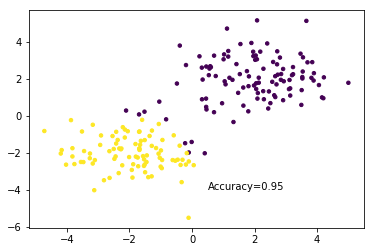

tensor(193, dtype=torch.uint8)


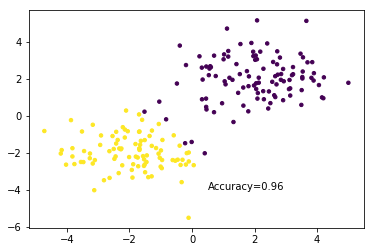

tensor(196, dtype=torch.uint8)


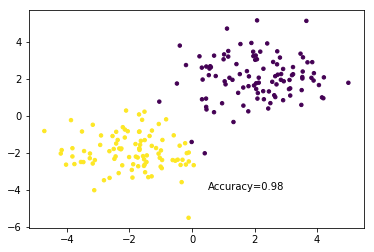

tensor(197, dtype=torch.uint8)


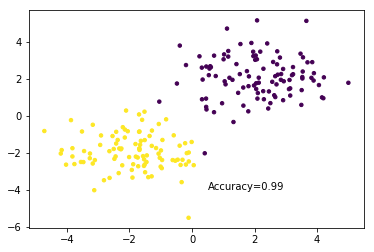

tensor(198, dtype=torch.uint8)


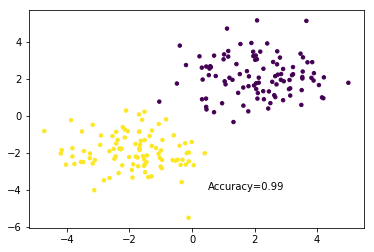

tensor(198, dtype=torch.uint8)


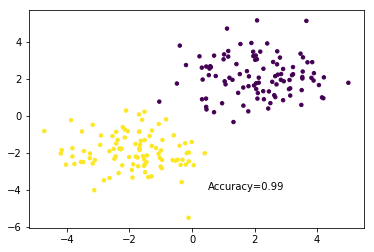

tensor(199, dtype=torch.uint8)


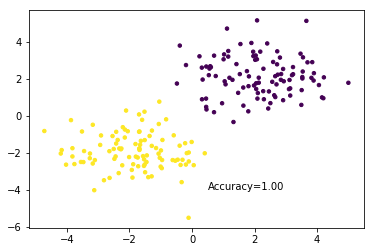

tensor(199, dtype=torch.uint8)


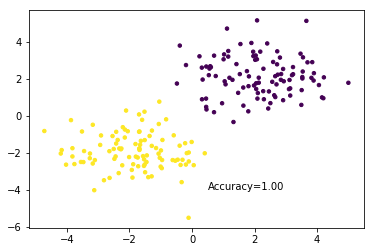

tensor(199, dtype=torch.uint8)


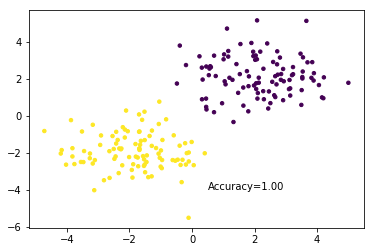

tensor(199, dtype=torch.uint8)


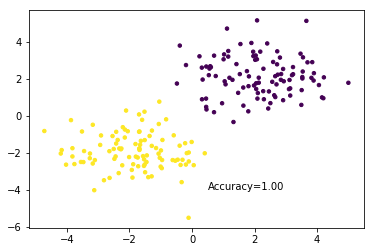

tensor(199, dtype=torch.uint8)


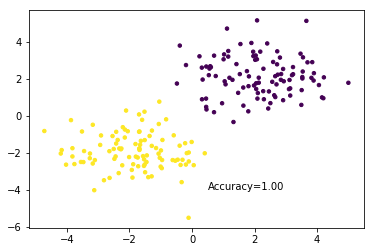

tensor(199, dtype=torch.uint8)


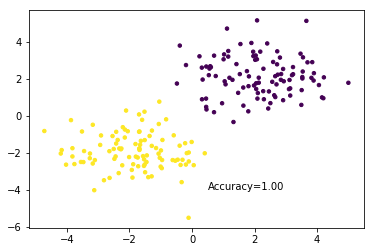

tensor(199, dtype=torch.uint8)


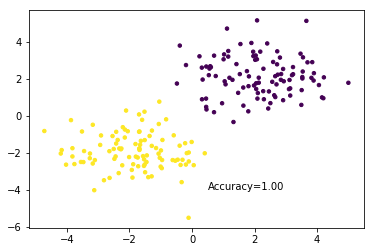

In [21]:
'''pytorch进行分类任务'''
#数据创建，数据为线性可分
datas = torch.ones(100, 2)# 设置为2维的原因是一个点有x，y两个坐标
x0 = torch.normal(2*datas, 1)
y0 = torch.zeros(x0.size()[0])
x1 = torch.normal(-2*datas, 1)
y1 = torch.ones(x1.size()[0])
x = torch.cat((x0, x1), dim=0).type(torch.float)
y = torch.cat((y0, y1), dim=0).type(torch.int64)

# plt.figure()
# plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=12, )
# plt.show()

#搭建分类器网络
class Classifier(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Classifier, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
#动态图显示部分
plt.ion()
plt.show()
    
classifier = Classifier(2, 10, 2)
#优化器选择
optimizer = torch.optim.SGD(classifier.parameters(), lr=0.02)
#损失函数选择
loss_func = torch.nn.CrossEntropyLoss()

for i in range(20):
    out = classifier.forward(x)# forward
    loss = loss_func(out, y)# loss
    optimizer.zero_grad()# 将以前保存的梯度值清零
    loss.backward()# backward
    optimizer.step()# 参数更新
    if i % 1 == 0:
        plt.cla()
        #输出是概率并不是类别，因此要手工取最大值的下标作为类别标记
        prediction = torch.max(out, 1)[1]  #[0]的话是返回最大的值，[1]的话是返回最大值的位置
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=prediction.data, s=12)
        accuracy = sum(prediction.data==y.data).type(torch.float) / 200.0
        plt.text(0.5, -4, 'Accuracy=%.2f'% accuracy)
        plt.pause(0.2)
plt.ioff()
plt.show()    

In [4]:
'''定义网络的第二种方法'''
'''与之前的使用类方法定义相同，该方法更加的简单'''
net = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
print(net)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


torch.Size([100, 1])


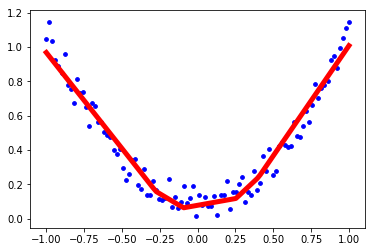

In [5]:
'''保存neural network和参数至pkl文件  从pkl文件中提取神经网络'''
#数据创建
#The math of Linear: `y = xA^T + b`  因此一行代表一个样例
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

Net = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

optimizer = torch.optim.SGD(Net.parameters(), lr=0.2)
loss_function = torch.nn.MSELoss()
for i in range(200):
    prediction = Net(x)
    loss = loss_function(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#保存整个神经网络或神经网络的参数
def save():
    torch.save(Net, 'net.pkl') #entire network
    torch.save(Net.state_dict(), 'net_params.pkl') #parameters
#从保存的文件中加载整个神经网络
def restore_net():
    torch.load('net.plk')
#从保存的文件中加载神经网络的参数
def restore_params():
    #在复制参数前需要创建一个与参数形式匹配的网络
    Net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
    Net2.load_state_dict(torch.load('net_params.pkl'))
    prediction = Net2(x)
    plt.figure()
    plt.scatter(x, y, c='b', s=14)
    plt.plot(x.data.numpy(), prediction.data.numpy(), c='r', lw=5)
    plt.show()
save()
restore_params()

In [29]:
'''小批量学习'''
BATCH_SIZE = 5 #总共十个数据分成两批
x = torch.arange(10)
y = torch.linspace(10, 1, 10).type(torch.int64)
torch_datasets = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_datasets,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)
for step, (batch_x, batch_y) in enumerate(loader):
    print('step: ', step, 'batch_x: ', batch_x, 'batch_y: ', batch_y)

step:  0 batch_x:  tensor([9, 3, 5, 7, 6]) batch_y:  tensor([1, 7, 5, 3, 4])
step:  1 batch_x:  tensor([4, 2, 8, 0, 1]) batch_y:  tensor([ 6,  8,  2, 10,  9])
